In [1]:
import os
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.model_selection import train_test_split
from tensorflow.keras import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, Flatten
from tensorflow.keras.utils import to_categorical
import warnings
warnings.filterwarnings('ignore')

In [2]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, BatchNormalization, Bidirectional, Attention
from tensorflow.keras.layers import TimeDistributed

In [8]:
import zipfile
path = '/content/Data.zip'
with zipfile.ZipFile(path, 'r') as zip_ref:
    zip_ref.extractall('/content/Data')

In [9]:
NUM_CLASSES = 25
NUM_FRAMES = 100
INPUT_DIM = 2
DATA_DIR = "/content/Data/Data"

In [10]:
def load_data(data_dir):
    X, y = [], []
    for class_label in range(1, NUM_CLASSES + 1):
        class_dir = os.path.join(data_dir, str(class_label))
        if not os.path.exists(class_dir):
            continue
        for csv_file in os.listdir(class_dir):
            file_path = os.path.join(class_dir, csv_file)
            data = pd.read_csv(file_path)
            if len(data) == NUM_FRAMES:  # Ensure the correct number of frames
                X.append(data[['x', 'y']].values)
                y.append(class_label - 1)  # 0-based index for classes
    X = np.array(X, dtype=np.float32)
    y = np.array(y, dtype=np.int32)
    return X, y

In [11]:
X,y = load_data(DATA_DIR)
y = to_categorical(y, NUM_CLASSES)

In [12]:
sum = 0
name = os.listdir(DATA_DIR)
for i in name:
    a = len(os.listdir(os.path.join(DATA_DIR,i)))
    sum+=int(a)
sum

1783

In [13]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.1, random_state=42)

In [14]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv1D, MaxPooling1D, LSTM, Dropout, BatchNormalization

def create_gesture_model(input_shape, num_classes):
    model = Sequential()

    # 1D Convolutional Layers
    model.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=input_shape))
    model.add(BatchNormalization())
    model.add(MaxPooling1D(pool_size=2))
    model.add(Dropout(0.2))

    model.add(Conv1D(filters=128, kernel_size=3, activation='relu'))
    model.add(BatchNormalization())
    model.add(MaxPooling1D(pool_size=2))
    model.add(Dropout(0.3))

    # LSTM Layer (no Flatten here)
    model.add(LSTM(128, return_sequences=False, activation='tanh'))
    model.add(Dropout(0.4))

    # Fully Connected Layers
    model.add(Dense(128, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(num_classes, activation='softmax'))  # Output layer for classification

    # Compile the model
    model.compile(
        optimizer='adam',
        loss='categorical_crossentropy',  # Use 'categorical_crossentropy' if labels are one-hot encoded
        metrics=['accuracy']
    )

    return model

# Input shape: (100 frames, 2 features for X and Y)
input_shape = (100, 2)
num_classes = 25  # Number of gesture classes
model = create_gesture_model(input_shape, num_classes)
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv1d (Conv1D)                      │ (None, 98, 64)              │             448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 98, 64)              │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d (MaxPooling1D)         │ (None, 49, 64)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 49, 64)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_1 (Conv1D)                    │ (None, 47, 128)             │          24,704 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 47, 128)             │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d_1 (MaxPooling1D)       │ (None, 23, 128)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 23, 128)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm (LSTM)                          │ (None, 128)                 │         131,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │          16,512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 25)                  │           3,225 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 177,241 (692.35 KB)

 Trainable params: 176,857 (690.85 KB)

 Non-trainable params: 384 (1.50 KB)

In [15]:
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, min_lr=1e-5)

history = model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=100,
    batch_size=32,
    callbacks=[early_stopping, reduce_lr]
)

Epoch 1/100
51/51 ━━━━━━━━━━━━━━━━━━━━ 7s 60ms/step - accuracy: 0.1787 - loss: 2.9243 - val_accuracy: 0.0782 - val_loss: 3.1053 - learning_rate: 0.0010
Epoch 2/100
51/51 ━━━━━━━━━━━━━━━━━━━━ 3s 59ms/step - accuracy: 0.6263 - loss: 1.4390 - val_accuracy: 0.0335 - val_loss: 4.3226 - learning_rate: 0.0010
Epoch 3/100
51/51 ━━━━━━━━━━━━━━━━━━━━ 4s 82ms/step - accuracy: 0.8028 - loss: 0.7561 - val_accuracy: 0.0335 - val_loss: 6.1360 - learning_rate: 0.0010
Epoch 4/100
51/51 ━━━━━━━━━━━━━━━━━━━━ 3s 52ms/step - accuracy: 0.8799 - loss: 0.4355 - val_accuracy: 0.0335 - val_loss: 6.3128 - learning_rate: 0.0010
Epoch 5/100
51/51 ━━━━━━━━━━━━━━━━━━━━ 5s 52ms/step - accuracy: 0.8865 - loss: 0.4462 - val_accuracy: 0.0335 - val_loss: 6.7165 - learning_rate: 0.0010
Epoch 6/100
51/51 ━━━━━━━━━━━━━━━━━━━━ 3s 68ms/step - accuracy: 0.9480 - loss: 0.2237 - val_accuracy: 0.0335 - val_loss: 6.1734 - learning_rate: 0.0010
Epoch 7/100
51/51 ━━━━━━━━━━━━━━━━━━━━ 4s 56ms/step - accuracy: 0.9549 - loss: 0.1830 - 

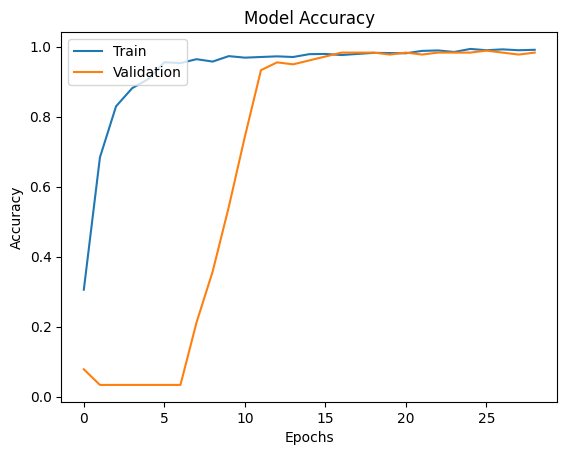

In [16]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

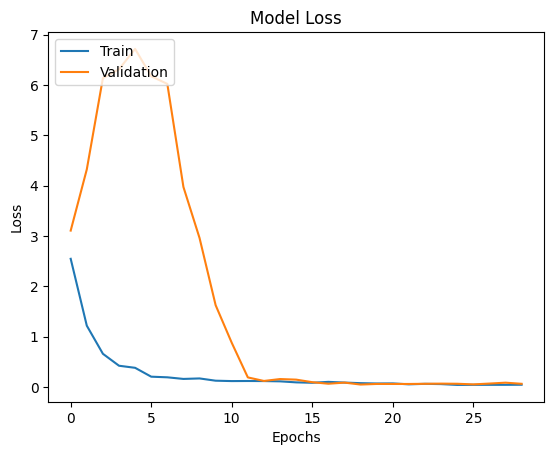

In [17]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [19]:
model.save('model_3.h5')

In [20]:
model.evaluate(X_val,y_val)

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - accuracy: 0.9877 - loss: 0.0333


[0.04552276432514191, 0.9832402467727661]

In [21]:
result = model.predict(X_val)

6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 57ms/step


In [24]:
classes_name = [
    "Alohomora",
    "Avada Kedavra",
    "Expelliarmus",
    "Expecto Patronum",
    "Lumos",
    "Nox",
    "Wingardium Leviosa",
    "Stupefy",
    "Library Lockus",
    "Professorious",
    "Mosquito Expellio",
    "Plagiarismus Detectio",
    "Basuri Melodico",
    "Giftus Appareus",
    "Manceps Bindio",
    "Ancestor Callium",
    "Dividius Zero",
    "Attendaceus Finalus",
    "Deadlineius Erasum",
    "Stressius",
    "Tempus Forwarius",
    "Tempus Reverisus",
    "Flyhigus Ascendo",
    "Flylowus Descendo",
    "Valentino"
]

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


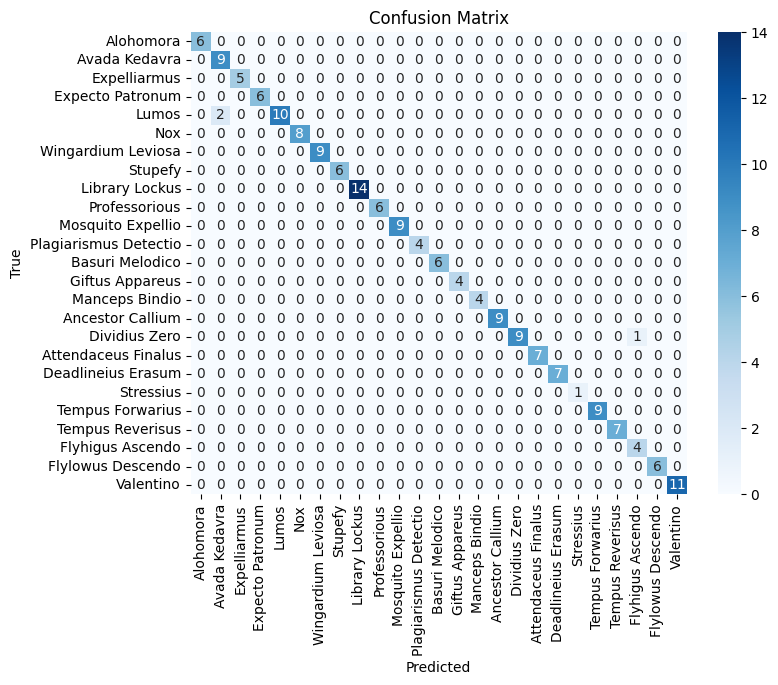

In [25]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

y_val_classes = np.argmax(y_val, axis=1)

y_pred = model.predict(X_val)
y_pred_classes = np.argmax(y_pred, axis=1)
cm = confusion_matrix(y_val_classes, y_pred_classes)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=classes_name, yticklabels=classes_name)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()
